## Linear Algebra Project

Fisher faces

In [1]:
import os, sys
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image

In [2]:
num_images = 15000

In [3]:
# load labels
data_labels = pd.read_csv('data/identity_CelebA.txt', header=None, sep=" ")

data_labels = data_labels.head(num_images)
data_labels.head()


,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [4]:
len(data_labels[1].unique())

6407

In [5]:

# load images into list
# images = []

num_subjects = len(data_labels[1].unique())

original_shape = (218, 178)

# read and redshape image
def read_img(img_name):
    img_pil = Image.open(img_name)
    # 3-d array of rgb into 2-d array of rgb
    img_pil = np.asarray(img_pil.convert('L'), dtype=np.uint8).reshape(1, 218*178) 
    return img_pil

data_folder = "data/img_align_celeba/"

i = 0

images = np.zeros([num_images, original_shape[0]*original_shape[1] ])

for filename in tqdm(os.listdir(data_folder)):
#     print(os.path.join(data_folder, filename))
    temp_img = read_img(os.path.join(data_folder, filename))
    images[i, :] = temp_img
#     images.append(temp_img)
    i += 1
    if i >= num_images:
        break

  0%|          | 0/202599 [00:00<?, ?it/s]

In [6]:
images

array([[233., 233., 233., ...,  66.,  68.,  68.],
       [ 56.,  54.,  54., ..., 116., 124., 124.],
       [255., 255., 255., ...,  93.,  94.,  94.],
       ...,
       [ 20.,  21.,  21., ..., 161., 164., 164.],
       [230., 238., 235., ..., 130., 123., 109.],
       [  0.,   0.,   0., ..., 158., 159., 159.]])

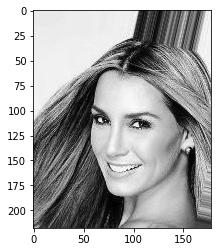

In [7]:
img_disp = Image.fromarray(images[0].reshape(original_shape))
plt.imshow(img_disp)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(images, data_labels[1], test_size=0.2, random_state=42)

In [8]:
from sklearn.decomposition import PCA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
plt.figure()
pca = PCA(n_components=4)
pca.fit(images)


PCA(n_components=4)

<Figure size 432x288 with 0 Axes>

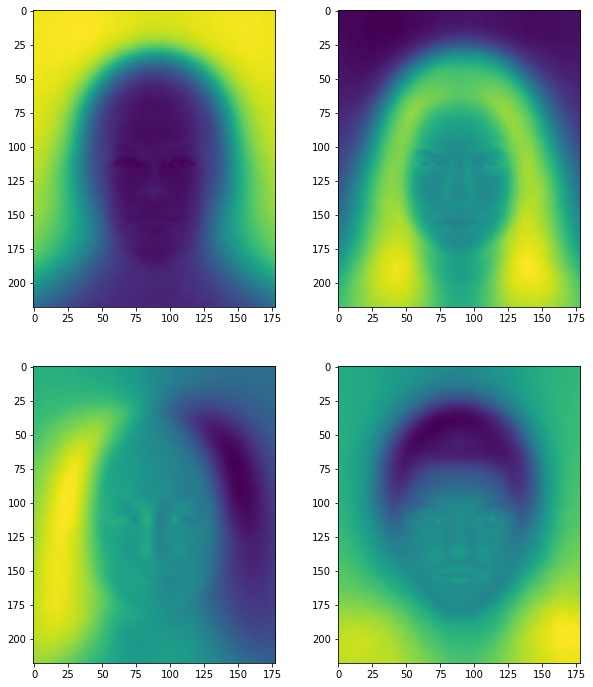

In [11]:
fig = plt.figure(figsize=(10, 12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(pca.components_[i].reshape(original_shape))
plt.show()

In [ ]:
# from sklearn import model_selection

# # %%Compute Fisherfaces

# #Use cross validation to check performance
# k_fold = model_selection.KFold(3, shuffle=True)
# for (trn, tst) in k_fold:
#     #Use PCA to transform from dimension F to dimension N-m
#     pca = PCA(n_components=(len(trn)))
#     pca.fit(images[trn])
#     #Compute LDA of reduced data
#     lda.fit(pca.transform(images[trn]), data_labels[1][trn])
#     yHat = lda.predict(pca.transform(images[tst]))
#     #Compute classification error
#     outVal = accuracy_score(data_labels[1][tst], yHat)
#     print('Score: ' + str(outVal))

In [12]:
from sklearn.metrics import accuracy_score

In [55]:
%%timeit -r 1 -n 1
lda = LinearDiscriminantAnalysis()
pca = PCA(n_components=10)
pca.fit(images)
lda.fit(pca.transform(images), data_labels[1])
yHat = lda.predict(pca.transform(images))
outVal = accuracy_score(data_labels[1], yHat)
print(outVal)

0.13733333333333334
48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [56]:
(pca.components_).shape

(50, 38804)

In [63]:
pca.n_samples_

15000

In [51]:
%%timeit -r 1 -n 1
lda = LinearDiscriminantAnalysis()
pca = PCA(n_components=50)
pca.fit(images)
lda.fit(pca.transform(images), data_labels[1])
yHat = lda.predict(pca.transform(images))
outVal = accuracy_score(data_labels[1], yHat)
print(outVal)

0.7313333333333333
45.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
(pca.components_).shape

(50, 38804)

In [53]:
%%timeit -r 1 -n 1
lda = LinearDiscriminantAnalysis()
pca = PCA(n_components=100)
pca.fit(images)
lda.fit(pca.transform(images), data_labels[1])
yHat = lda.predict(pca.transform(images))
outVal = accuracy_score(data_labels[1], yHat)
print(outVal)

0.9088
55 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [54]:
(pca.components_).shape

(50, 38804)

In [45]:
%%timeit -r 1 -n 1
lda = LinearDiscriminantAnalysis()
pca = PCA(n_components=200)
pca.fit(images)
lda.fit(pca.transform(images), data_labels[1])
yHat = lda.predict(pca.transform(images))
outVal = accuracy_score(data_labels[1], yHat)
print(outVal)

0.9743333333333334
1min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [50]:
(pca.components_).shape

(50, 38804)

In [66]:
pca = PCA(n_components=10)



In [68]:
pca.fit(images)

PCA(n_components=10)

In [69]:
(pca.components_).shape

(10, 38804)